# SDS Challenge #3 - Job Postings

## Problem Statement

Welcome Data Scientist to the 3rd SDS Club Monthly Challenge! In this month's challenge you are helping your friend search for a job. Your friend has found thousands of job ads online and is trying to pick some to apply to. Your friends has heard that there are a lot of fraudulent job ads that are actually scams. Your mission is to help your friend by predicting whether a job is fraudulent based on the data provided.

## Evaluation

\begin{equation*}
accuracy = \frac{TP + TN}{TP + TN + FP + FN}
\end{equation*}
<br>

## Understanding the Dataset

Each column in the dataset is labeled and explained in more detail below.

**title** - title of the job in ad <br>
**location** - location of job ad <br>
**department** - corporate department <br>
**salary_range** - salary range of job <br>
**company_profile** - description of company <br>
**description** - description of position <br>
**requirements** - description of job requirements <br>
**benefits** - benefits offered by the employer <br>
**telecommuting** - if telecommuting position <br>
**has_company_logo** - if the company's logo is present in the ad <br>
**has_questions** - if interview questions are present in ad <br>
**employment_type** - type of employment (full-time, part-time, contract, etc.) <br>
**required_experience** - required experience for job (master's degree, bachelor, doctorate, etc.) <br>
**industry** - industry of company (Construction, Health Care, IT, etc.) <br>
**function** - function of company within industry (consulting, sales, research, etc.) <br>
**fraudulent** - whether job is fraudulent or not <br>

## Dataset Files

**public_jobs.csv** - Dataset to train and analyze <br>
**pred_jobs.csv** - Dataset to predict whether or not a job posting is fraudulent

### Load Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns

In C:\Users\Siya\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Siya\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Siya\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\Siya\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Siya\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle

### Load Data

In [2]:
train = pd.read_csv('public_jobs.csv')
test = pd.read_csv('pred_jobs.csv')

In [3]:
train.head()

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,Sales Professional - Buiding Products,"CA, BC, Langley",Langley,60000-90000,Great Customer Service from Start to FinishWha...,"Centra Windows an established, employee-owned ...",NaN,NaN,0,1,1,Full-time,Mid-Senior level,NaN,Building Materials,Sales,0
1,Senior Software Engineer,"GB, , London",Engineering,NaN,We believe cities are complicated. And your mo...,"Londoners, New Yorkers, Parisians, and Berline...",We're looking for someone with several years' ...,NaN,0,1,1,Full-time,NaN,NaN,Computer Software,Engineering,0
2,Director of Operations (SCM & Manufacturing),"US, WA, Bellingham",Operations,50000-70000,POS-X is a rapidly growing point-of-sale hardw...,POS-X is a rapidly growing point-of-sale hardw...,Extensive Mathematical and/or Financial Backgr...,"$50 - $70k DOE and Performance + Medical, 401k...",0,1,1,Full-time,Director,Bachelor's Degree,Computer Hardware,Supply Chain,0
3,Data Center Migration App Lead for FULL-TIME O...,"US, PA, Harrisburg",NaN,0-0,NaN,Data Center Migration Application Lead / Archi...,NaN,NaN,0,0,0,Full-time,Director,Bachelor's Degree,Information Technology and Services,Information Technology,1
4,Data Entry Assistant - Intern,"HK, , Hong Kong",Marketing,8000-14000,"At Hayes-Corp, we create the fun stuff. With ...","Hayes Corp is looking for a patient, meticulou...",Degree in any discipline.Familiar with Microso...,"Opportunity to grow with the company, as data ...",0,1,0,Other,Entry level,Bachelor's Degree,Internet,Marketing,0


In [4]:
train.tail()

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
14299,Outside Sales Professional-Windsor,"US, WI, Windsor",NaN,NaN,"ABC Supply Co., Inc. is the nation’s largest w...","As an Outside Sales Representative, you must h...",Track Record of Sales Success – B2B or B2CNo m...,"As an Outside Sales Representative, you will r...",0,1,0,NaN,NaN,NaN,NaN,NaN,0
14300,VP of Product,"US, CA, San Francisco",Prod,NaN,"At iMATCHATIVE, we believe in the power of sci...",We are a well-funded financial technology star...,8+ years of experience defining and shipping a...,NaN,0,1,0,Full-time,Executive,Bachelor's Degree,Financial Services,Product Management,0
14301,Sales Director,"US, PA, Philadelphia",NaN,60000-90000,We launched Involvio as students at Drexel Uni...,Come be one of the charter members of our sale...,4-year degree5+ years of successful performanc...,Cool old city officesCompetitive salary and st...,0,1,1,Full-time,Director,Bachelor's Degree,Internet,Sales,0
14302,Mac IT Manager,"US, NY, New York",NaN,NaN,ustwo offers you the opportunity to be yoursel...,We’re looking for an enthusiastic and experien...,Must have...• Superb troubleshooting and analy...,"Benefits: 100% Healthcare, Dental, Vision, Dis...",0,1,0,NaN,NaN,NaN,NaN,NaN,0
14303,Client Services Assistant,"GB, HNS, London",Client Services,NaN,Essence London is a members lifestyle club – o...,The RoleThe Client Service Associate is respon...,ExperienceProven track record of delivering sa...,NaN,0,1,1,NaN,NaN,NaN,NaN,NaN,0


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14304 entries, 0 to 14303
Data columns (total 17 columns):
title                  14304 non-null object
location               14029 non-null object
department             5122 non-null object
salary_range           2325 non-null object
company_profile        11651 non-null object
description            14303 non-null object
requirements           12155 non-null object
benefits               8546 non-null object
telecommuting          14304 non-null int64
has_company_logo       14304 non-null int64
has_questions          14304 non-null int64
employment_type        11542 non-null object
required_experience    8674 non-null object
required_education     7837 non-null object
industry               10404 non-null object
function               9144 non-null object
fraudulent             14304 non-null int64
dtypes: int64(4), object(13)
memory usage: 1.9+ MB


There are a couple of features with missing values:
1. Department 
2. Salary_Range
3. Company Profile
4. Requirements
5. Benefits
6. Employment type
7. Required Education
8. Required Experience
9. Industry
10. Function
11. Location

### Data Visualisation

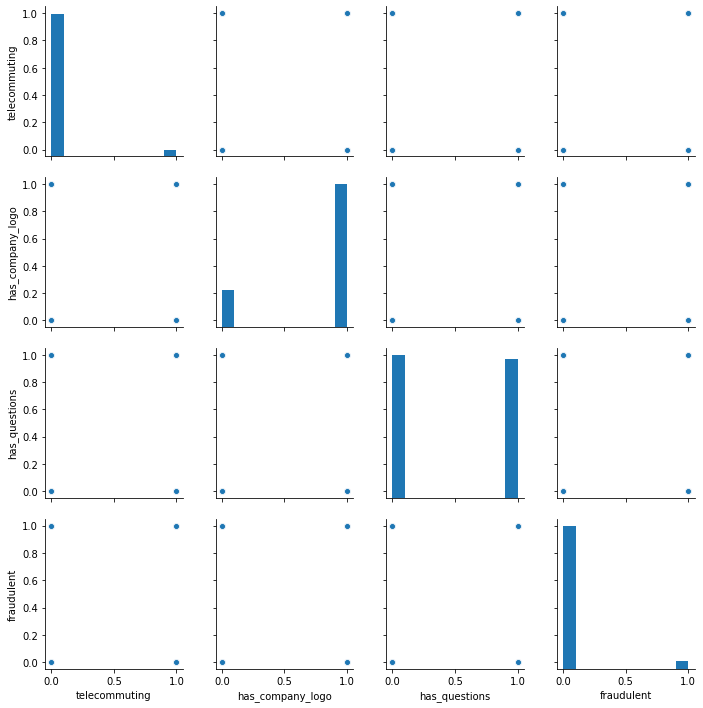

In [6]:
sns.pairplot(train)

In [7]:
train['fraudulent'].value_counts()

0    13595
1      709
Name: fraudulent, dtype: int64

There are less fraudulent job offers than there are proper offers

In [8]:
num_fraud_ads = (709/14304)*100
print('Percentage of Fraudulent Offers: {0:.2f}%'.format(num_fraud_ads))

Percentage of Fraudulent Offers: 4.96%


In [9]:
num_proper_ads = (13595/14304)*100
print('Percentage of Proper Offers: {0:.2f}%'.format(num_proper_ads))

Percentage of Proper Offers: 95.04%


Lets get the value counts for the different features

In [10]:
train['title'].value_counts()

English Teacher Abroad                                                       238
Graduates: English Teacher Abroad (Conversational)                           117
Customer Service Associate                                                   116
English Teacher Abroad                                                        75
Software Engineer                                                             72
                                                                            ... 
Job for freelancer working in Saudi Arabia                                     1
We are recruiting fragrance and beauty promotional staff in Milton Keynes      1
TEFL Teacher                                                                   1
Ruby on Rails Specialist                                                       1
Designer, Mobile Web                                                           1
Name: title, Length: 9269, dtype: int64

In [11]:
train['location'].value_counts()

GB, LND, London                  579
US, NY, New York                 529
US, CA, San Francisco            380
GR, I, Athens                    363
US, ,                            271
                                ... 
US, , Herndon                      1
PH, 14, Quezon City                1
US, AZ, Chandler/Mesa/Gilbert      1
GB, NTT, NOTTINGHAM                1
US, MI, Sterling Heights           1
Name: location, Length: 2750, dtype: int64

In [12]:
train['department'].value_counts()

Sales                                                        450
Engineering                                                  387
Marketing                                                    322
Operations                                                   225
IT                                                           183
                                                            ... 
Impact                                                         1
6 locations in the United States, 3 in Canada and 1 in UK      1
Sensor Systems                                                 1
Digital                                                        1
Mkt                                                            1
Name: department, Length: 1172, dtype: int64

In [13]:
train['industry'].value_counts()

Information Technology and Services    1368
Computer Software                      1107
Internet                                847
Marketing and Advertising               667
Education Management                    648
                                       ... 
Public Policy                             2
Sporting Goods                            1
Plastics                                  1
Wine and Spirits                          1
Ranching                                  1
Name: industry, Length: 128, dtype: int64

In [14]:
train['employment_type'].value_counts()

Full-time    9317
Contract     1216
Part-time     630
Temporary     191
Other         188
Name: employment_type, dtype: int64

<AxesSubplot:xlabel='employment_type', ylabel='count'>

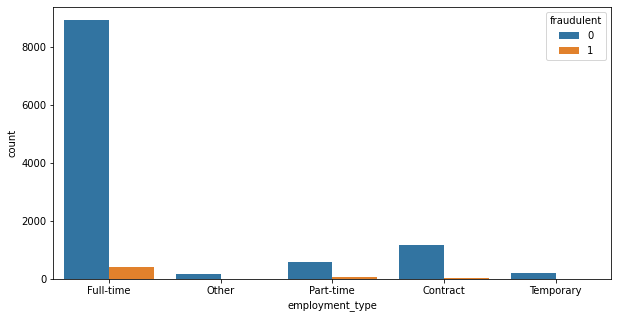

In [15]:
plt.figure(figsize = (10,5))
sns.countplot(x = 'employment_type', hue = 'fraudulent', data = train)

In [16]:
pd.crosstab(train['employment_type'], train['fraudulent'])

fraudulent,0,1
employment_type,,
Contract,1178,38
Full-time,8914,403
Other,175,13
Part-time,574,56
Temporary,189,2


In [17]:
train['function'].value_counts()

Information Technology    1370
Sales                     1183
Engineering               1094
Customer Service           970
Marketing                  669
Administrative             497
Design                     279
Education                  271
Health Care Provider       267
Other                      263
Management                 248
Business Development       178
Accounting/Auditing        176
Human Resources            171
Finance                    152
Project Management         148
Consulting                 115
Writing/Editing            102
Art/Creative               100
Product Management          90
Quality Assurance           88
Production                  87
Advertising                 81
Business Analyst            71
Data Analyst                70
Manufacturing               57
General Business            55
Public Relations            53
Legal                       43
Research                    41
Strategy/Planning           35
Supply Chain                30
Training

In [18]:
pd.crosstab(train['function'], train['industry'])

industry,Accounting,Airlines/Aviation,Animation,Apparel & Fashion,Architecture & Planning,Automotive,Aviation & Aerospace,Banking,Biotechnology,Broadcast Media,...,Translation and Localization,Transportation/Trucking/Railroad,Utilities,Venture Capital & Private Equity,Veterinary,Warehousing,Wholesale,Wine and Spirits,Wireless,Writing and Editing
function,,,,,,,,,,,,,,,,,,,,,
Accounting/Auditing,36,0,0,3,0,4,0,1,1,0,...,0,0,1,0,0,0,0,0,1,0
Administrative,29,2,0,4,0,0,1,1,3,0,...,1,1,0,0,0,2,0,0,0,0
Advertising,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Art/Creative,0,0,2,7,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Business Analyst,0,2,0,0,0,0,0,2,2,1,...,0,0,0,1,0,0,0,0,0,0
Business Development,0,0,0,1,0,8,0,5,0,1,...,0,0,0,2,0,0,0,0,0,0
Consulting,0,0,0,0,0,0,0,3,0,0,...,0,0,0,0,0,0,0,0,0,0
Customer Service,7,3,0,4,0,14,0,20,0,0,...,0,3,0,0,3,0,1,0,0,0
Data Analyst,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [19]:
pd.crosstab(train['function'], train['fraudulent'])

fraudulent,0,1
function,,
Accounting/Auditing,151,25
Administrative,406,91
Advertising,76,5
Art/Creative,99,1
Business Analyst,71,0
Business Development,167,11
Consulting,111,4
Customer Service,916,54
Data Analyst,67,3


In [20]:
pd.crosstab(train['function'], train['fraudulent']).idxmax(axis=0)

fraudulent
0    Information Technology
1               Engineering
dtype: object

<AxesSubplot:xlabel='function', ylabel='count'>

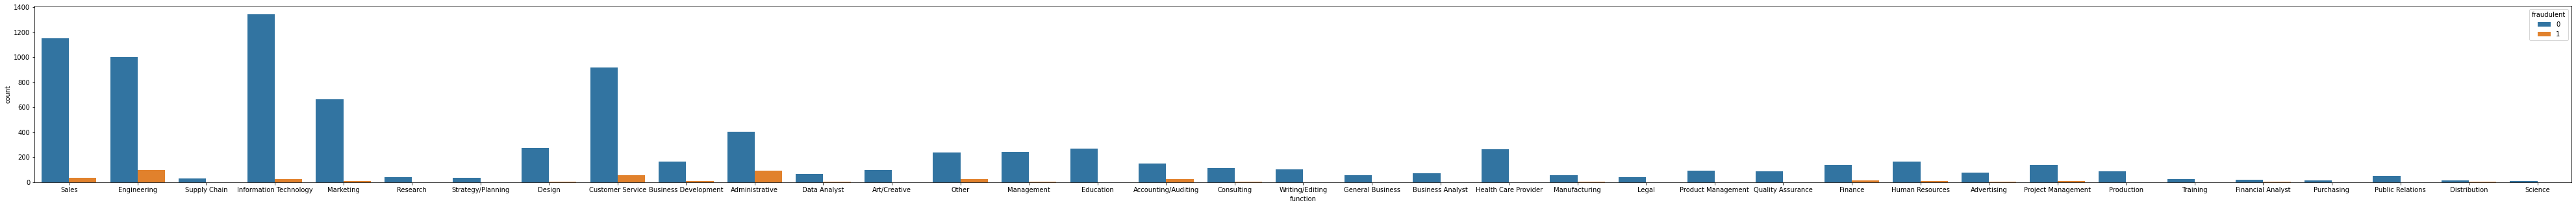

In [21]:
plt.figure(figsize = (70,5))
sns.countplot(x = 'function', hue = 'fraudulent', data = train)

From these results, we can see that majority of jobs with a function in the engineering and adminstration industries have a high fraudulent ad rate.

In [22]:
train['required_experience'].value_counts()

Mid-Senior level    3029
Entry level         2175
Associate           1844
Not Applicable       880
Director             318
Internship           312
Executive            116
Name: required_experience, dtype: int64

In [23]:
pd.crosstab(train['required_experience'], train['fraudulent'])

fraudulent,0,1
required_experience,,
Associate,1810,34
Director,306,12
Entry level,2031,144
Executive,107,9
Internship,303,9
Mid-Senior level,2930,99
Not Applicable,834,46


According to the data, there are more fraudulent entry level jobs, as well as Mid-Senior level. And Not Applicable experience ads as well

<AxesSubplot:xlabel='required_experience', ylabel='count'>

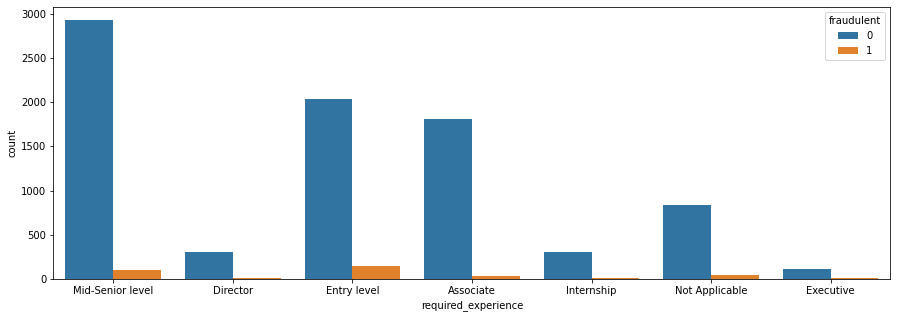

In [24]:
plt.figure(figsize = (15,5))
sns.countplot(x = 'required_experience', hue = 'fraudulent', data = train)

In [25]:
train['salary_range'].value_counts()

0-0             115
40000-50000      57
30000-40000      46
45000-67000      34
25000-30000      28
               ... 
14436-28000       1
50000-95000       1
10000-120000      1
91000-150000      1
90-100            1
Name: salary_range, Length: 765, dtype: int64

In [26]:
train['salary_range'][train['fraudulent'] == 1]

3                 0-0
24        30000-50000
119               NaN
140               NaN
229               NaN
             ...     
14173             NaN
14186           25-30
14222             NaN
14245             NaN
14256    95000-115000
Name: salary_range, Length: 709, dtype: object

In [27]:
train['salary_range'][train['fraudulent'] == 0]

0        60000-90000
1                NaN
2        50000-70000
4         8000-14000
5                NaN
            ...     
14299            NaN
14300            NaN
14301    60000-90000
14302            NaN
14303            NaN
Name: salary_range, Length: 13595, dtype: object

<AxesSubplot:xlabel='has_company_logo', ylabel='count'>

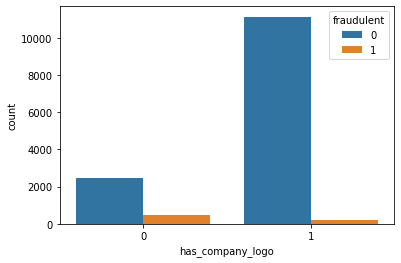

In [28]:
sns.countplot(x = 'has_company_logo', hue = 'fraudulent', data = train)

So from the above observation, we can see that, according to our data, companies without any company logo have more fraudulent ads than companies who do have a logo.

In [29]:
pd.crosstab(train['location'], train['fraudulent'])

fraudulent,0,1
location,,
"AE, ,",5,0
"AE, , Abudhabi",1,0
"AE, , Dubai",3,0
"AE, , Media City | Dubai",2,0
"AE, AZ,",4,0
...,...,...
"ZA, NL, Richards Bay",7,0
"ZA, WC, Cape Town",4,0
"ZA, WC, Oudtshoorn",0,1


In [30]:
location = pd.crosstab(train['location'], train['fraudulent']).idxmax(axis=0) ## Return index of first occurrence of maximum over requested axis
print(location)

fraudulent
0    GB, LND, London
1    US, TX, Houston
dtype: object


In [31]:
train['required_education'].value_counts()

Bachelor's Degree                    4096
High School or equivalent            1689
Unspecified                          1127
Master's Degree                       339
Associate Degree                      212
Certification                         131
Some College Coursework Completed      81
Professional                           68
Vocational                             38
Some High School Coursework            23
Doctorate                              22
Vocational - HS Diploma                 6
Vocational - Degree                     5
Name: required_education, dtype: int64

In [32]:
pd.crosstab(train['required_education'], train['fraudulent'])

fraudulent,0,1
required_education,,
Associate Degree,208,4
Bachelor's Degree,4009,87
Certification,116,15
Doctorate,21,1
High School or equivalent,1550,139
Master's Degree,317,22
Professional,64,4
Some College Coursework Completed,78,3
Some High School Coursework,7,16


<AxesSubplot:xlabel='required_education', ylabel='count'>

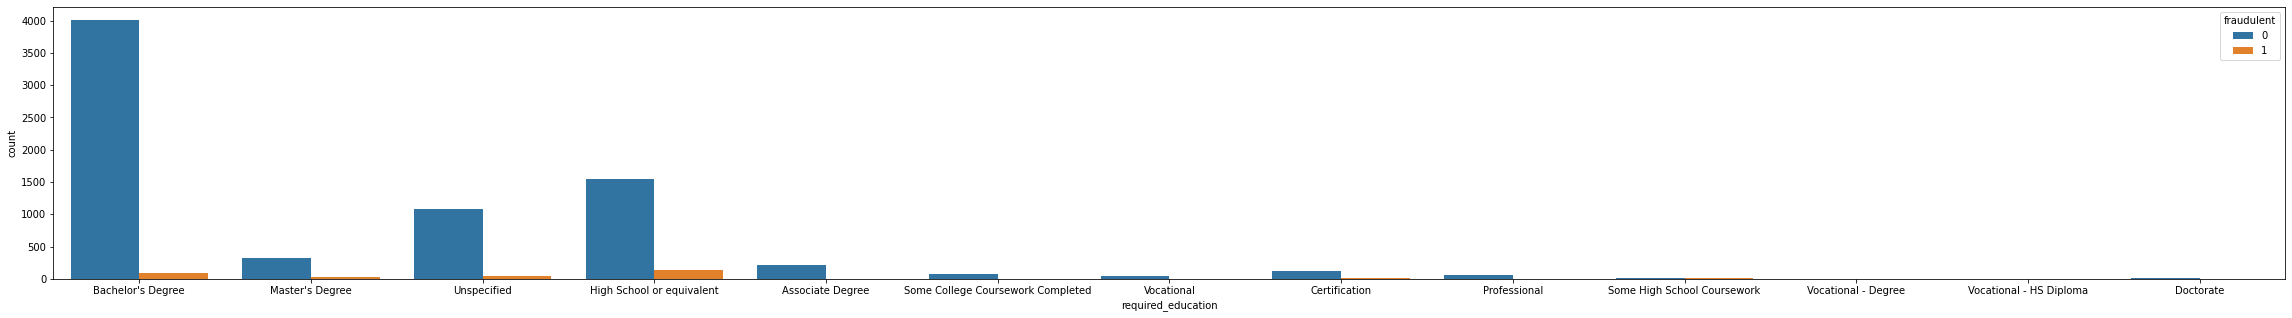

In [33]:
plt.figure(figsize = (40,5))
sns.countplot(x = 'required_education', hue = 'fraudulent', data = train)

In [34]:
train['telecommuting'].value_counts()

0    13681
1      623
Name: telecommuting, dtype: int64

In [35]:
companies_with_telecommuting = (623 / (13681 + 623))*100
print('Companies with Telecommuting: {0:.2f}%'.format(companies_with_telecommuting))

Companies with Telecommuting: 4.36%


In [36]:
companies_with_no_telecommuting = (13681 / (13681 + 623))*100
print('Companies with No Telecommuting: {0:.2f}%'.format(companies_with_no_telecommuting))

Companies with No Telecommuting: 95.64%


<AxesSubplot:xlabel='telecommuting', ylabel='count'>

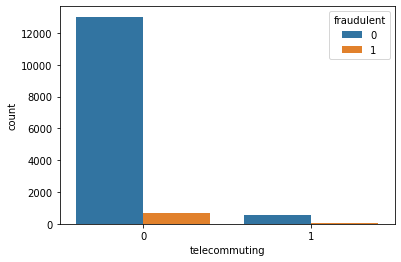

In [37]:
sns.countplot(x = 'telecommuting', hue = 'fraudulent', data = train)

In [38]:
pd.crosstab(train['telecommuting'], train['fraudulent'])

fraudulent,0,1
telecommuting,,
0,13026,655
1,569,54


<AxesSubplot:xlabel='has_questions', ylabel='count'>

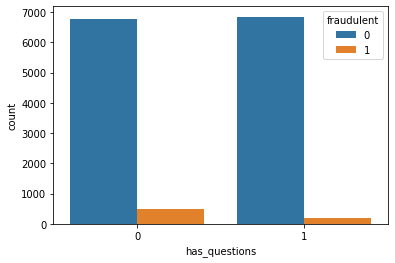

In [39]:
sns.countplot(x = 'has_questions', hue = 'fraudulent', data = train)

In [40]:
pd.crosstab(train['has_questions'], train['fraudulent'])

fraudulent,0,1
has_questions,,
0,6755,500
1,6840,209


In [41]:
number_of_missing_values = train['location'].isna().sum()
print(number_of_missing_values)

275


In [42]:
number_of_missing_values_1 = train['benefits'].isna().sum()
print(number_of_missing_values_1)

5758


In [43]:
number_of_missing_values_2 = train['employment_type'].isna().sum()
print(number_of_missing_values_2)

2762


In [44]:
number_of_missing_values_3 = train['department'].isna().sum()
print(number_of_missing_values_3)

9182


In [45]:
number_of_missing_values_4= train['industry'].isna().sum()
print(number_of_missing_values_4)

3900


In [46]:
number_of_missing_values_5 = train['function'].isna().sum()
print(number_of_missing_values)

275


In [47]:
number_of_missing_values_6 = train['salary_range'].isna().sum()
print(number_of_missing_values)

275


In [48]:
number_of_missing_values_7 = train['required_education'].isna().sum()
print(number_of_missing_values_7)

6467


### Data Cleaning

In [49]:
train.drop('title', axis = 1, inplace = True)

In [50]:
train.drop('company_profile', axis = 1, inplace = True)

In [51]:
train.drop('department', axis = 1, inplace = True)

In [52]:
train.drop('description', axis = 1, inplace = True)

In [53]:
train.drop('requirements', axis = 1, inplace = True)

In [54]:
train.drop('benefits', axis = 1, inplace = True)

In [55]:
train.head()

,location,salary_range,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,"CA, BC, Langley",60000-90000,0,1,1,Full-time,Mid-Senior level,NaN,Building Materials,Sales,0
1,"GB, , London",NaN,0,1,1,Full-time,NaN,NaN,Computer Software,Engineering,0
2,"US, WA, Bellingham",50000-70000,0,1,1,Full-time,Director,Bachelor's Degree,Computer Hardware,Supply Chain,0
3,"US, PA, Harrisburg",0-0,0,0,0,Full-time,Director,Bachelor's Degree,Information Technology and Services,Information Technology,1
4,"HK, , Hong Kong",8000-14000,0,1,0,Other,Entry level,Bachelor's Degree,Internet,Marketing,0


In [56]:
train.shape

(14304, 11)

In [57]:
train['salary_range'].isna().sum()

11979

In [58]:
train['location'].isna().sum()

275

In [59]:
train['has_company_logo'].isna().sum()

0

In [60]:
train['has_questions'].isna().sum()

0

In [61]:
train['employment_type'].isna().sum()

2762

In [62]:
train['required_experience'].isna().sum()

5630

In [63]:
train['required_education'].isna().sum()

6467

In [64]:
train['industry'].isna().sum()

3900

In [65]:
train['function'].isna().sum()

5160

### Impute Missing Data

Impute the missing values of the categorical features using the common values, acquired by using the value_counts() function

In [66]:
train['salary_range'].value_counts()

0-0             115
40000-50000      57
30000-40000      46
45000-67000      34
25000-30000      28
               ... 
14436-28000       1
50000-95000       1
10000-120000      1
91000-150000      1
90-100            1
Name: salary_range, Length: 765, dtype: int64

In [67]:
train['salary_range'].fillna("0-0", inplace = True)

In [68]:
train['salary_range'].isna().sum()

0

In [69]:
train['location'].fillna("GB, LND, London ", inplace = True)

In [70]:
train['location'].isna().sum()

0

In [71]:
train['employment_type'].fillna("Full-time", inplace = True)

In [72]:
train['employment_type'].isna().sum()

0

In [73]:
train['required_experience'].fillna("Mid-Senior level", inplace = True)

In [74]:
train['required_experience'].isna().sum()

0

In [75]:
train['industry'].fillna("Information Technology and Services", inplace = True)

In [76]:
train['industry'].isna().sum()

0

In [77]:
train['function'].fillna("Information Technology", inplace = True)

In [78]:
train['function'].isna().sum()

0

In [79]:
train['required_education'].fillna("Bachelor's Degree", inplace = True)

In [80]:
train['required_education'].isna().sum()

0

In [81]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14304 entries, 0 to 14303
Data columns (total 11 columns):
location               14304 non-null object
salary_range           14304 non-null object
telecommuting          14304 non-null int64
has_company_logo       14304 non-null int64
has_questions          14304 non-null int64
employment_type        14304 non-null object
required_experience    14304 non-null object
required_education     14304 non-null object
industry               14304 non-null object
function               14304 non-null object
fraudulent             14304 non-null int64
dtypes: int64(4), object(7)
memory usage: 1.2+ MB


#### Encode Categorical Data

In [82]:
train['location']= train['location'].astype('category').cat.codes
train['salary_range']= train['salary_range'].astype('category').cat.codes
train['employment_type']= train['employment_type'].astype('category').cat.codes
train['required_experience']= train['required_experience'].astype('category').cat.codes
train['required_education']= train['required_education'].astype('category').cat.codes
train['function']= train['function'].astype('category').cat.codes
train['industry']= train['industry'].astype('category').cat.codes

In [83]:
train.head()

,location,salary_range,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,107,624,0,1,1,1,5,1,10,31,0
1,327,0,0,1,1,1,5,1,21,12,0
2,2655,574,0,1,1,1,1,1,19,34,0
3,2404,0,0,0,0,1,1,1,57,18,1
4,773,693,0,1,0,2,2,1,60,22,0


In [84]:
test.shape

(3576, 16)

### Split data into features and labels

In [85]:
X = train.iloc[:, :-1].values
y = train.iloc[:,-1].values

In [86]:
X

array([[ 107,  624,    0, ...,    1,   10,   31],
       [ 327,    0,    0, ...,    1,   21,   12],
       [2655,  574,    0, ...,    1,   19,   34],
       ...,
       [2419,  624,    0, ...,    1,   60,   31],
       [2239,    0,    0, ...,    1,   57,   18],
       [ 482,    0,    0, ...,    1,   57,   18]], dtype=int64)

In [87]:
y 

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [88]:
X

array([[ 107,  624,    0, ...,    1,   10,   31],
       [ 327,    0,    0, ...,    1,   21,   12],
       [2655,  574,    0, ...,    1,   19,   34],
       ...,
       [2419,  624,    0, ...,    1,   60,   31],
       [2239,    0,    0, ...,    1,   57,   18],
       [ 482,    0,    0, ...,    1,   57,   18]], dtype=int64)

### Train Test Split

In [89]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val = train_test_split(X, y, test_size =0.2, random_state =0)

### Feature Scaling

In [90]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_val = sc.transform(X_val)

### Train Model

In [91]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
model = classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_val)

In [124]:
for v in y_pred:
    print(y_pred[v])

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


### Validate Model

In [92]:
from sklearn.metrics import confusion_matrix
# Use a Confusion Matrix to evaluate
cm = confusion_matrix(y_val, y_pred)
print(cm)

[[2723    3]
 [ 100   35]]


In [93]:
from sklearn.metrics import accuracy_score
# Use the Accuracy score to evaulate
score = accuracy_score(y_val, y_pred)
print('Accuracy Score for XGBClassifier: {0:.2f} %'.format(score*100))

Accuracy Score for XGBClassifier: 96.40 %


### Test Model

In [94]:
test = pd.read_csv('pred_jobs.csv')

In [95]:
test.head()

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function
0,Part-time Pizza Delivery Drivers - Wallasey,"GB, WRL, Wallasey",,NaN,Take Out Brands is a food franchise business w...,Papa John’s is one of the world’s biggest and ...,You must be 19 years old or above – and will n...,Pay rates will be £6.31 / hour (21 and over) A...,0,1,1,Part-time,Not Applicable,NaN,Retail,NaN
1,Director of Contact Center Operations,"US, AZ, Tempe",Operations,NaN,"J-Curve Technologies, a privately held Arizona...",J-Curve Technologies is currently in search of...,Experience and Education: Minimum of 5-8 years...,Full time employees enjoy a comprehensive bene...,0,1,1,Full-time,Not Applicable,NaN,NaN,Management
2,Technical Solution Consultant,"US, IL, Chicago",NaN,80000-105000,Retailers around the world are constantly work...,Job Title: Technical Solution ConsultantDepart...,NaN,NaN,0,0,0,Full-time,Mid-Senior level,Bachelor's Degree,Information Technology and Services,Information Technology
3,Vacancies At The Cafe Royal Hotel London,"GB, EAW, london",Hospitality,NaN,NaN,"AVAILABLE POSITIONS:Catering staffs, managers,...",Word Perfect;Typing;Public Speaking;Scheduling...,The Hotel Management would be responsible to c...,0,0,0,NaN,NaN,NaN,NaN,NaN
4,Car Dealer Sales Manager/Customer Service,"GR, I, Athens",NaN,NaN,Ilias Sotiropoulos first went into business as...,Full time Sales Manager/Customer Service for a...,Max 35 years old.Living close to the workplace...,NaN,0,1,0,Full-time,Mid-Senior level,Unspecified,Retail,Sales


In [96]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3576 entries, 0 to 3575
Data columns (total 16 columns):
title                  3576 non-null object
location               3505 non-null object
department             1211 non-null object
salary_range           543 non-null object
company_profile        2921 non-null object
description            3576 non-null object
requirements           3030 non-null object
benefits               2124 non-null object
telecommuting          3576 non-null int64
has_company_logo       3576 non-null int64
has_questions          3576 non-null int64
employment_type        2867 non-null object
required_experience    2156 non-null object
required_education     1938 non-null object
industry               2573 non-null object
function               2281 non-null object
dtypes: int64(3), object(13)
memory usage: 447.1+ KB


### Data Cleaning

In [97]:
test.drop('title', axis = 1, inplace = True)
test.drop('company_profile', axis = 1, inplace = True)
test.drop('department', axis = 1, inplace = True)
test.drop('description', axis = 1, inplace = True)
test.drop('requirements', axis = 1, inplace = True)
test.drop('benefits', axis = 1, inplace = True)

In [98]:
test.head()

,location,salary_range,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function
0,"GB, WRL, Wallasey",NaN,0,1,1,Part-time,Not Applicable,NaN,Retail,NaN
1,"US, AZ, Tempe",NaN,0,1,1,Full-time,Not Applicable,NaN,NaN,Management
2,"US, IL, Chicago",80000-105000,0,0,0,Full-time,Mid-Senior level,Bachelor's Degree,Information Technology and Services,Information Technology
3,"GB, EAW, london",NaN,0,0,0,NaN,NaN,NaN,NaN,NaN
4,"GR, I, Athens",NaN,0,1,0,Full-time,Mid-Senior level,Unspecified,Retail,Sales


### Impute Missing values

In [99]:
test['salary_range'].value_counts()

0-0              27
25000-30000       9
40000-50000       9
30000-40000       9
70000-90000       9
                 ..
41000-45000       1
1000-1400         1
120000-170000     1
14000-25000       1
55000-90000       1
Name: salary_range, Length: 311, dtype: int64

In [100]:
test['salary_range'].fillna("0-0", inplace = True)

In [101]:
test['employment_type'].value_counts()

Full-time    2303
Contract      308
Part-time     167
Temporary      50
Other          39
Name: employment_type, dtype: int64

In [102]:
test['employment_type'].fillna("Full-time", inplace = True)

In [103]:
test['required_education'].value_counts()

Bachelor's Degree                    1049
High School or equivalent             391
Unspecified                           270
Master's Degree                        77
Associate Degree                       62
Certification                          39
Some College Coursework Completed      21
Vocational                             11
Professional                            6
Some High School Coursework             4
Doctorate                               4
Vocational - HS Diploma                 3
Vocational - Degree                     1
Name: required_education, dtype: int64

In [104]:
test['required_education'].fillna("Bachelor's Degree", inplace = True)

In [105]:
test['required_experience'].value_counts()

Mid-Senior level    780
Entry level         522
Associate           453
Not Applicable      236
Director             71
Internship           69
Executive            25
Name: required_experience, dtype: int64

In [106]:
test['required_experience'].fillna("Mid-Senior level", inplace = True)

In [107]:
test['industry'].value_counts()

Information Technology and Services    366
Computer Software                      269
Internet                               215
Education Management                   174
Marketing and Advertising              161
                                      ... 
Shipbuilding                             1
Investment Banking                       1
Investment Management                    1
Motion Pictures and Film                 1
Wireless                                 1
Name: industry, Length: 113, dtype: int64

In [108]:
test['function'].value_counts()

Information Technology    379
Sales                     285
Customer Service          259
Engineering               254
Marketing                 161
Administrative            133
Health Care Provider       71
Management                 69
Other                      62
Design                     61
Education                  54
Business Development       50
Accounting/Auditing        36
Project Management         35
Human Resources            34
Art/Creative               32
Writing/Editing            30
Production                 29
Consulting                 29
Product Management         24
Quality Assurance          23
Public Relations           23
Finance                    20
Manufacturing              17
Business Analyst           13
General Business           13
Data Analyst               12
Financial Analyst          11
Strategy/Planning          11
Training                   11
Advertising                 9
Research                    9
Distribution                6
Supply Cha

In [109]:
test['function'].fillna('Information Technology', inplace = True)

In [110]:
test['industry'].fillna('Information Technology and Services', inplace = True)

In [111]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3576 entries, 0 to 3575
Data columns (total 10 columns):
location               3505 non-null object
salary_range           3576 non-null object
telecommuting          3576 non-null int64
has_company_logo       3576 non-null int64
has_questions          3576 non-null int64
employment_type        3576 non-null object
required_experience    3576 non-null object
required_education     3576 non-null object
industry               3576 non-null object
function               3576 non-null object
dtypes: int64(3), object(7)
memory usage: 279.5+ KB


In [112]:
test['location'].value_counts()

GB, LND, London             139
US, NY, New York            129
GR, I, Athens               101
US, CA, San Francisco        92
US, ,                        68
                           ... 
US, NJ, Fair Haven            1
US, NY, Long Isalnd City      1
US, FL, Cocoa                 1
IN, HR, GURGAON               1
FI, ES, Helsinki              1
Name: location, Length: 1195, dtype: int64

In [113]:
test['location'].fillna("GB, LND, London", inplace = True)

In [114]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3576 entries, 0 to 3575
Data columns (total 10 columns):
location               3576 non-null object
salary_range           3576 non-null object
telecommuting          3576 non-null int64
has_company_logo       3576 non-null int64
has_questions          3576 non-null int64
employment_type        3576 non-null object
required_experience    3576 non-null object
required_education     3576 non-null object
industry               3576 non-null object
function               3576 non-null object
dtypes: int64(3), object(7)
memory usage: 279.5+ KB


### Encode Categorical Data

In [115]:
test['location']= test['location'].astype('category').cat.codes
test['salary_range']= test['salary_range'].astype('category').cat.codes
test['employment_type']= test['employment_type'].astype('category').cat.codes
test['required_experience']= test['required_experience'].astype('category').cat.codes
test['required_education']= test['required_education'].astype('category').cat.codes
test['function']= test['function'].astype('category').cat.codes
test['industry']= test['industry'].astype('category').cat.codes

In [116]:
test.head()

,location,salary_range,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function
0,282,0,0,1,1,3,6,1,98,18
1,516,0,0,1,1,1,6,1,54,20
2,733,284,0,0,0,1,5,1,54,18
3,195,0,0,0,0,1,5,1,54,18
4,296,0,0,1,0,1,5,9,98,31


In [117]:
X_test = test.iloc[:,:].values

In [118]:
X_test

array([[282,   0,   0, ...,   1,  98,  18],
       [516,   0,   0, ...,   1,  54,  20],
       [733, 284,   0, ...,   1,  54,  18],
       ...,
       [372,   0,   0, ...,   1,  54,   5],
       [936,   0,   0, ...,   1,  57,   9],
       [105,   0,   0, ...,   1,  68,  18]], dtype=int64)

In [119]:
X_test = sc.transform(X_test)

In [129]:
predictions = classifier.predict(X_test)
predictions.shape

(3576,)

In [135]:
predictions_df = pd.DataFrame(predictions, columns = ['Predictions'])

In [136]:
predictions_df.head()

,Predictions
0,0
1,0
2,0
3,0
4,0


In [138]:
predictions_df.to_csv(r'C:\Users\Siya\Videos\ML Projects\Job_Prediction_SDS\challenge_3\SDS_Challenge_3.csv', index = False, header=True)

## Submission

All submissions should be sent through email to challenges@superdatascience.com. When submitting, the file should contain predictions made on the pred_jobs.csv file, and it should have the following format:

In [122]:
0
1
0
0
1
0

0

## Acknowledgements

The data was collected and published by The University of the Aegean, Laboratory of Information & Communication Systems Security.